# Car Price Prediction Project:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_excel("used_cars CarDekho.xlsx")
df.head()

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,...,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,0,2014 Maruti Wagon R,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,...,Drum,341 Litres,1675,1620,3655,1340,-,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh
1,1,2015 Hyundai Grand i10,Petrol,"73,875 kms",1197,Manual,18.9 kmpl,5,White,82,...,Drum,256-liters,1520,1660,3765,-,8,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh
2,2,2018 Volkswagen Vento,Diesel,"97,922 kms",1498,Manual,22.27 kmpl,5,White,108.6,...,Drum,494,1467,1699,4390,1750,-,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh
3,3,2019 Maruti S-Presso,Petrol,"24,230 kms",998,Manual,21.7 kmpl,5,Red,67.05,...,Drum,270,1564,1520,3565,1170,9.5,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh
4,4,2017 Maruti Wagon R,Petrol,"41,174 kms",998,Automatic,20.51 kmpl,5,Grey,67,...,Drum,180-liters,1700,1495,3599,1350,9,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh


This is a Regression problem as our target variable i.e. Price column is a continuous data.

We will drop the Unnamed:0 column as it is just having index.

In [3]:
#Droping unnecessary column
df = df.drop(["Unnamed: 0"],axis=1)

# Features Information:

- Car_Name : Name of the car with Year
- Fuel_type : Type of fuel used for car engine
- Running_in_kms : Car running in kms till date
- Endline_disp : Engine displacement/engine CC
- Gear_transmission : Type of gear transmission used in car
- Milage_in_km/ltr : Overall mileage of car in Km/ltr
- Seating_cap : Availability of number of seats in the car
- color : Car color
- Max_power : Maximum power of engine used in car in bhp
- front_brake_type : type of brake system used for front-side wheels
- rear_brake_type : type of brake system used for back-side wheels
- cargo_volume : the total cubic feet of space in a car's cargo area.
- height : Total height of car in mm
- width : Width of car in mm
- length : TOtal length of the car in mm
- Weight : Gross weight of the car in kg
- Insp_score : inspection rating out of 10
- top_speed : Maximum speed limit of the car in km per hours
- City_url : Url of the page of cars from a particular city
- Car_price : Price of the car

In [4]:
#Checking shape of the dataset
df.shape

(12608, 20)

The dataset is having 12608 rows and 20 columns.

In [5]:
#Lets check all the names of the columns
df.columns

Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Endine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'Weight', 'Insp_score', 'top_speed',
       'City_url', 'Car_price'],
      dtype='object')

These are the list of column names.

In [6]:
#Let us check for missing values
df.isnull().sum()

Car_Name                0
Fuel_type               0
Running_in_kms          0
Endine_disp             0
Gear_transmission       0
Milage_in_km/ltr        0
Seating_cap            55
color                   0
Max_power               1
front_brake_type       76
rear_brake_type        76
cargo_volume          447
height                 56
width                  56
length                 56
Weight                 37
Insp_score              0
top_speed            1798
City_url                0
Car_price               0
dtype: int64

We need to replace entries like '-' and 'null' with nan.

In [7]:
#Replacing unnecessary entries
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

In [8]:
#Checking for null values again
df.isnull().sum()

Car_Name                 0
Fuel_type                0
Running_in_kms           0
Endine_disp             60
Gear_transmission        0
Milage_in_km/ltr        29
Seating_cap            104
color                  274
Max_power              145
front_brake_type       214
rear_brake_type        215
cargo_volume          8388
height                 254
width                  255
length                 254
Weight                6074
Insp_score           10876
top_speed             4316
City_url                 0
Car_price                0
dtype: int64

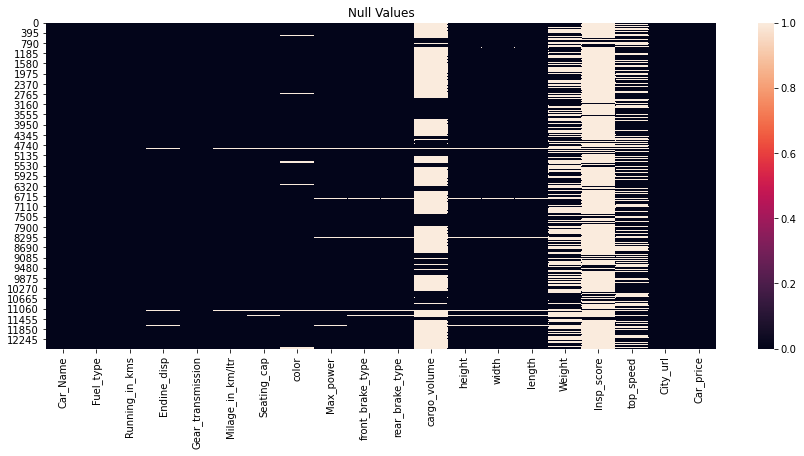

In [9]:
#Visualizing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By visualization we can clearly say that there are many null values in the dataset.

In Cargo volume and Insp score as there is more than 50% null values, we can drop both those columns.

In [10]:
#Dropping unnecessary columns
df.drop(columns = ['cargo_volume','Insp_score'], inplace = True)

In [11]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12608 entries, 0 to 12607
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           12608 non-null  object
 1   Fuel_type          12608 non-null  object
 2   Running_in_kms     12608 non-null  object
 3   Endine_disp        12548 non-null  object
 4   Gear_transmission  12608 non-null  object
 5   Milage_in_km/ltr   12579 non-null  object
 6   Seating_cap        12504 non-null  object
 7   color              12334 non-null  object
 8   Max_power          12463 non-null  object
 9   front_brake_type   12394 non-null  object
 10  rear_brake_type    12393 non-null  object
 11  height             12354 non-null  object
 12  width              12353 non-null  object
 13  length             12354 non-null  object
 14  Weight             6534 non-null   object
 15  top_speed          8292 non-null   object
 16  City_url           12608 non-null  objec

There are some missing values in the dataset which needs to be taken care of before model building.

# Feature Extraction:

## Car_Name: 
As Car_Name column has year of manufacture, car model and car name all together so we have to separate them.

In [12]:
#Extracting manufacturing year and car name from Car_Name
df['Manu_year'] = df['Car_Name'].str[0:4]
df['car_name'] = df['Car_Name'].str[4:]
df.drop(columns = 'Car_Name', inplace = True)

In [13]:
df['Car_Brand'] = df.car_name.str.split(' ').str.get(1)
df['Car_Model'] = df.car_name.str.split(' ').str[2:]
df['Car_Model'] = df['Car_Model'].apply(lambda x: ','.join(map(str, x)))
df['Car_Model'] = df['Car_Model'].str.replace(',',' ')
df.drop(columns = 'car_name', inplace = True)

## Car_price:

As Car_price is our target it should be in the format of continuous data, so we have change the Price column from lakhs and crores to integer format.

In [14]:
df['car_price'] = df['Car_price'].str.replace('Lakh','100000')
df['car_price'] = df['car_price'].str.replace(',','')
df['car_price'] = df['car_price'].str.replace('Cr','10000000')

In [15]:
df[['a','b']] = df.car_price.str.split(expand=True)

In [16]:
df['a'] = df['a'].astype('float')
df['b'] = df['b'].astype('float')

In [17]:
#Checking for null values in the dataset
df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Endine_disp            60
Gear_transmission       0
Milage_in_km/ltr       29
Seating_cap           104
color                 274
Max_power             145
front_brake_type      214
rear_brake_type       215
height                254
width                 255
length                254
Weight               6074
top_speed            4316
City_url                0
Car_price               0
Manu_year               0
Car_Brand               0
Car_Model               0
car_price               0
a                       0
b                      91
dtype: int64

In [18]:
df['b']=df['b'].fillna(value = 1)

In [19]:
df['car_price'] = df['a'] * df['b']

In [20]:
df.drop(columns = ['Car_price','a','b'], inplace = True)

## Running_in_kms:

This column should be int datatype but it has some string values and ',' in between so let's replace them.

In [21]:
df['KMS_driven'] = df['Running_in_kms'].str.replace('kms','')
df['KMS_driven'] = df['KMS_driven'].str.replace(',','')
df['KMS_driven'] = df['KMS_driven'].str.replace('1 Lakh ','100000')
df['KMS_driven'] = df['KMS_driven'].astype('float')
df.drop(columns = ['Running_in_kms'], inplace = True)

In [22]:
df.dtypes

Fuel_type             object
Endine_disp           object
Gear_transmission     object
Milage_in_km/ltr      object
Seating_cap           object
color                 object
Max_power             object
front_brake_type      object
rear_brake_type       object
height                object
width                 object
length                object
Weight                object
top_speed             object
City_url              object
Manu_year             object
Car_Brand             object
Car_Model             object
car_price            float64
KMS_driven           float64
dtype: object

## Endine_disp:

The column 'Endine_disp' should be continuous column so i will convert it to float datatype.

In [23]:
df['Engine_disp']=df['Endine_disp']
df.Engine_disp = df.Engine_disp.astype('float')
df.drop(columns = ['Endine_disp'], inplace = True)

## Milage_in_km/ltr:


In Milage_in_km/ltr column the data type is object so we have to change this to float type.

In [24]:
df['Mileage(KMPL)'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Mileage(KMPL)'] = df['Mileage(KMPL)'].str.replace('km/kg','')
df['Mileage(KMPL)'] = df['Mileage(KMPL)'].str.replace('km/hr','')
df['Mileage(KMPL)'] = df['Mileage(KMPL)'].astype('float')
df.drop(columns = ['Milage_in_km/ltr'], inplace = True)

## Converting the data type of columns height, width and length to float datatype:

In [25]:
df['Height'] = df['height'].str.replace(',','')
df['Height'] = df['Height'].str[0:4]
df['Width'] = df['width'].str.replace(',','')
df['Length'] = df['length'].str.replace(',','')
df.Height = df.Height.astype('float')
df.Width = df.Width.astype('float')
df.Length = df.Length.astype('float')
df.drop(columns = ['height','width','length'], inplace = True)

## Weight:

The datatype of Weight has to be changed to float.

In [26]:
#getting numerical values from Weight column
df['Weight'] = df['Weight'].str.replace(',','')
df['Weight'] = df['Weight'].str[0:4]
df.Weight = df.Weight.astype('float')

## top_speed:

Let's change the datatype of top_speed column to float.

In [27]:
#getting numerical values from top_speed column
df['top_speed'] = df['top_speed'].str[0:3]
df.top_speed = df.top_speed.astype('float')

## City_url:

Let's extract city name from city url column.

In [28]:
#Checking value counts of City_url column
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+delhi-ncr    1490
https://www.cardekho.com/used-cars+in+bangalore    1486
https://www.cardekho.com/used-cars+in+mumbai       1478
https://www.cardekho.com/used-cars+in+new-delhi    1473
https://www.cardekho.com/used-cars+in+pune         1239
https://www.cardekho.com/used-cars+in+gurgaon      1040
https://www.cardekho.com/used-cars+in+noida         982
https://www.cardekho.com/used-cars+in+hyderabad     918
https://www.cardekho.com/used-cars+in+chennai       836
https://www.cardekho.com/used-cars+in+kolkata       595
https://www.cardekho.com/used-cars+in+ahmedabad     579
https://www.cardekho.com/used-cars+in+jaipur        492
Name: City_url, dtype: int64

In [29]:
#Replacing city names from city urls
df['city_name'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+bangalore', 'Bangalore')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+mumbai', 'mumbai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+chennai', 'Chennai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+hyderabad', 'hyderabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+pune', 'pune')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+delhi-ncr', 'delhi-ncr')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+ahmedabad', 'ahmedabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+gurgaon', 'gurgaon')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+noida', 'noida')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+kolkata', 'kolkata')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+jaipur', 'jaipur')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+new-delhi', 'new-delhi')

In [30]:
#Let's check the value count again
df['city_name'].value_counts()

delhi-ncr    1490
Bangalore    1486
mumbai       1478
new-delhi    1473
pune         1239
gurgaon      1040
noida         982
hyderabad     918
Chennai       836
kolkata       595
ahmedabad     579
jaipur        492
Name: city_name, dtype: int64

Since we have extracted city names let's drop City_url.

In [31]:
#Dropping unnecessary column
df.drop(columns = 'City_url', inplace = True)

## Seating_cap:

Let's change the data type of seating_cap to float type.

In [32]:
#converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

## Manu_Year:

Let's extract car age from manufactured year.

In [33]:
df.Manu_year = df.Manu_year.astype('float')
df['Car_age'] = 2021 - df['Manu_year']
df.drop(columns = 'Manu_year', inplace = True)

## Max_power:

We have to change the datatype of Max_power column to float datatype.

In [34]:
#getting numerical values from column Max_power and converting them to float type
df['Max_power'] = df['Max_power'].str[0:5]

In [35]:
df['Max_power'] = df['Max_power'].str.replace('PS','')
df['Max_power'] = df['Max_power'].str.replace('ps','')
df['Max_power'] = df['Max_power'].str.replace('Bh','')
df['Max_power'] = df['Max_power'].str.replace('P','')

In [36]:
df.Max_power = df.Max_power.astype('float')

## front_brake_type:

Let's group the similar entries in this column.

In [37]:
#Checking the value counts of front_brake_type
df['front_brake_type'].value_counts()

Disc                                        6902
Ventilated Disc                             4785
Solid Disc                                   181
Ventilated Discs                             141
Disc & Caliper Type                           83
Disk                                          73
Ventilated DIsc                               51
Ventilated discs                              33
Drum                                          25
Ventilated Disk                               17
Multilateral Disc                             14
264mm Ventilated discs                        13
Electric Parking Brake                        11
Vantilated Disc                               10
Disc & Drum                                    7
Vacuum assisted hydraulic dual circuit w       7
Disc,internally ventilated                     6
Discs                                          6
Disc, 236 mm                                   5
Ventillated Disc                               4
disc                

In [38]:
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Disc,internally ventilated","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Booster assisted ventilated disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

In [39]:
#Checking the value counts of front_brake_type again
df['front_brake_type'].value_counts()

Disc                                        7171
Ventilated Disc                             5070
Disc & Caliper Type                           83
Drum                                          25
Multilateral Disc                             14
Electric Parking Brake                        11
Vacuum assisted hydraulic dual circuit w       7
Disc & Drum                                    7
Carbon ceramic                                 2
Mechanical-hydraulic dual circuit              1
Dual Circuit with ABS, ABS with BAS            1
Ventilated & Grooved Steel Discs               1
Tandem master cylinder with Servo assist       1
Name: front_brake_type, dtype: int64

## rare_brake_type:

Let's group the similar entries in this column.

In [40]:
#Checking value counts of rare_break_type column
df['rear_brake_type'].value_counts()

Drum                                        10022
Disc                                         1409
Ventilated Disc                               296
Solid Disc                                    208
Leading-Trailing Drum                         103
Disc & Caliper Type                            83
Self-Adjusting Drum                            50
Discs                                          42
Ventilated discs                               32
Ventilated Discs                               25
Drums                                          20
262mm Disc & Drum Combination                  13
Self Adjusting Drum                            12
Disc & Drum                                    12
Electric Parking Brake                         11
Ventilated Drum                                 8
Leading & Trailing Drum                         8
Vacuum assisted hydraulic dual circuit w        7
Drums 180 mm                                    5
drum                                            4


In [41]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in Discs","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in disc","Drum",inplace=True)
df["rear_brake_type"].replace("Discs","Disc",inplace=True)
df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Disc Brakes","Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

In [42]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in the dataset.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Petrol      7056
Diesel      5422
CNG           92
LPG           27
Electric      11
Name: Fuel_type, dtype: int64
****************************************
Manual       9608
Automatic    3000
Name: Gear_transmission, dtype: int64
****************************************
5.0     10976
7.0      1164
8.0       152
4.0       129
6.0        50
9.0        17
2.0        13
10.0        3
Name: Seating_cap, dtype: int64
****************************************
White            3629
Silver           1905
Other            1729
Grey             1576
Red               986
                 ... 
GARNITE GREY        1
Espreso Brown       1
AVANT BRONZE        1
PURPLE              1
Ice Blue            1
Name: color, Length: 195, dtype: int64
****************************************
74.00     616
81.80     541
88.50     527
67.05     439
67.04     326
         ... 
161.00      1
64.40       1
76.90       1
61.60       1
91.72       1
Name: Max_power, Length: 376, dtype: int64
*************************

Now the dataset is good to work with.

In [43]:
#Checking the datatypes of all columns again
df.dtypes

Fuel_type             object
Gear_transmission     object
Seating_cap          float64
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
Weight               float64
top_speed            float64
Car_Brand             object
Car_Model             object
car_price            float64
KMS_driven           float64
Engine_disp          float64
Mileage(KMPL)        float64
Height               float64
Width                float64
Length               float64
city_name             object
Car_age              float64
dtype: object

Now in my dataset i have two types of datas.

In [44]:
#Checking unique values of each column
df.nunique()

Fuel_type               5
Gear_transmission       2
Seating_cap             8
color                 195
Max_power             376
front_brake_type       13
rear_brake_type        17
Weight                230
top_speed             120
Car_Brand              35
Car_Model             275
car_price            1227
KMS_driven           4577
Engine_disp           143
Mileage(KMPL)         478
Height                241
Width                 224
Length                321
city_name              12
Car_age                25
dtype: int64

Above are the unique value counts of each column.

# Lets replace null values:

In [45]:
#Checking null values in the dataset
df.isnull().sum()

Fuel_type               0
Gear_transmission       0
Seating_cap           104
color                 274
Max_power             145
front_brake_type      214
rear_brake_type       215
Weight               6074
top_speed            4316
Car_Brand               0
Car_Model               0
car_price               0
KMS_driven              0
Engine_disp            60
Mileage(KMPL)          29
Height                254
Width                 255
Length                254
city_name               0
Car_age                 0
dtype: int64

We will replace the null values in continuous columns by their mean and in categorical columns with their mode.

In [46]:
#Checking for skewness in the dataset
df.skew()

Seating_cap      2.444332
Max_power        2.939518
Weight           1.032898
top_speed        0.896381
car_price        9.610453
KMS_driven       7.906142
Engine_disp      1.895318
Mileage(KMPL)   -0.511076
Height           0.955643
Width            0.800815
Length           0.434823
Car_age          0.723524
dtype: float64

In the numerical columns with skewness null values has to be replaced by median.

In [47]:
#Replacing nan values
for col in ['Engine_disp','Mileage(KMPL)','Max_power','Height','Width','Weight','top_speed']:
    df[col] = df[col].fillna(df[col].median())
for col in ['Length']:
    df[col] = df[col].fillna(df[col].mean())
for col1 in ['Seating_cap','color','front_brake_type','rear_brake_type']:
    df[col1] = df[col1].fillna(df[col1].mode()[0])

In [48]:
#Checking null values in the dataset again
df.isnull().sum()

Fuel_type            0
Gear_transmission    0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
Weight               0
top_speed            0
Car_Brand            0
Car_Model            0
car_price            0
KMS_driven           0
Engine_disp          0
Mileage(KMPL)        0
Height               0
Width                0
Length               0
city_name            0
Car_age              0
dtype: int64

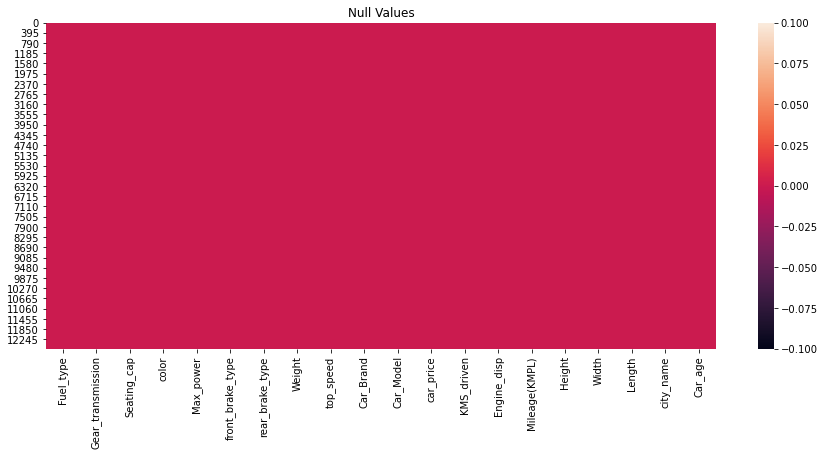

In [49]:
#Visualizing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

As we can see now, that there are no null values in the dataset now.

In [50]:
#Printing the dataset
df.head()

,Fuel_type,Gear_transmission,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,Weight,top_speed,Car_Brand,Car_Model,car_price,KMS_driven,Engine_disp,Mileage(KMPL),Height,Width,Length,city_name,Car_age
0,Petrol,Manual,5.0,Grey,67.05,Disc,Drum,1340.0,169.0,Maruti,Wagon R,294000.0,131125.0,998.0,21.79,1675.0,1620.0,3655.0,ahmedabad,7.0
1,Petrol,Manual,5.0,White,82.00,Disc,Drum,1520.0,165.0,Hyundai,Grand i10,480000.0,73875.0,1197.0,18.90,1520.0,1660.0,3765.0,ahmedabad,6.0
2,Diesel,Manual,5.0,White,108.60,Ventilated Disc,Drum,1750.0,180.0,Volkswagen,Vento,711000.0,97922.0,1498.0,22.27,1467.0,1699.0,4390.0,ahmedabad,3.0
3,Petrol,Manual,5.0,Red,67.05,Ventilated Disc,Drum,1170.0,169.0,Maruti,S-Presso,422000.0,24230.0,998.0,21.70,1564.0,1520.0,3565.0,ahmedabad,2.0
4,Petrol,Automatic,5.0,Grey,67.00,Ventilated Disc,Drum,1350.0,152.0,Maruti,Wagon R,430000.0,41174.0,998.0,20.51,1700.0,1495.0,3599.0,ahmedabad,4.0


In [51]:
#Checking description of data set
df.describe()

,Seating_cap,Max_power,Weight,top_speed,car_price,KMS_driven,Engine_disp,Mileage(KMPL),Height,Width,Length,Car_age
count,12608.000000,12608.000000,12608.000000,12608.000000,1.260800e+04,1.260800e+04,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000
mean,5.218036,100.130872,1603.173065,171.672430,7.709751e+05,5.772259e+04,1436.207249,19.556908,1563.792989,1718.849540,4083.963089,6.121352
std,0.693750,44.445694,319.636585,21.392996,1.080141e+06,4.027723e+04,494.852497,4.220344,111.054497,125.361262,398.610518,3.143337
min,2.000000,32.500000,1000.000000,86.000000,3.000000e+04,2.000000e+02,0.000000,0.000000,148.000000,1410.000000,3099.000000,0.000000
25%,5.000000,74.000000,1510.000000,163.000000,3.510000e+05,3.300000e+04,1197.000000,17.010000,1488.000000,1675.250000,3765.000000,4.000000
50%,5.000000,86.800000,1520.000000,169.000000,5.150000e+05,5.500000e+04,1248.000000,19.600000,1520.000000,1700.000000,3995.000000,6.000000
75%,5.000000,113.400000,1580.000000,175.000000,7.490000e+05,7.586225e+04,1498.000000,22.070000,1630.000000,1765.000000,4413.000000,8.000000
max,10.000000,641.000000,3350.000000,327.000000,3.080000e+07,1.080000e+06,5998.000000,36.000000,1995.000000,2220.000000,5295.000000,35.000000


Above is the statistics about the datasets.The mean and the 2nd quantile values are almost same so the skewness and outliers are less in number.

# EDA:

# Univariate Analysis:

In [52]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']


These are the list of categorical columns.

In [53]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Seating_cap', 'Max_power', 'Weight', 'top_speed', 'car_price', 'KMS_driven', 'Engine_disp', 'Mileage(KMPL)', 'Height', 'Width', 'Length', 'Car_age']


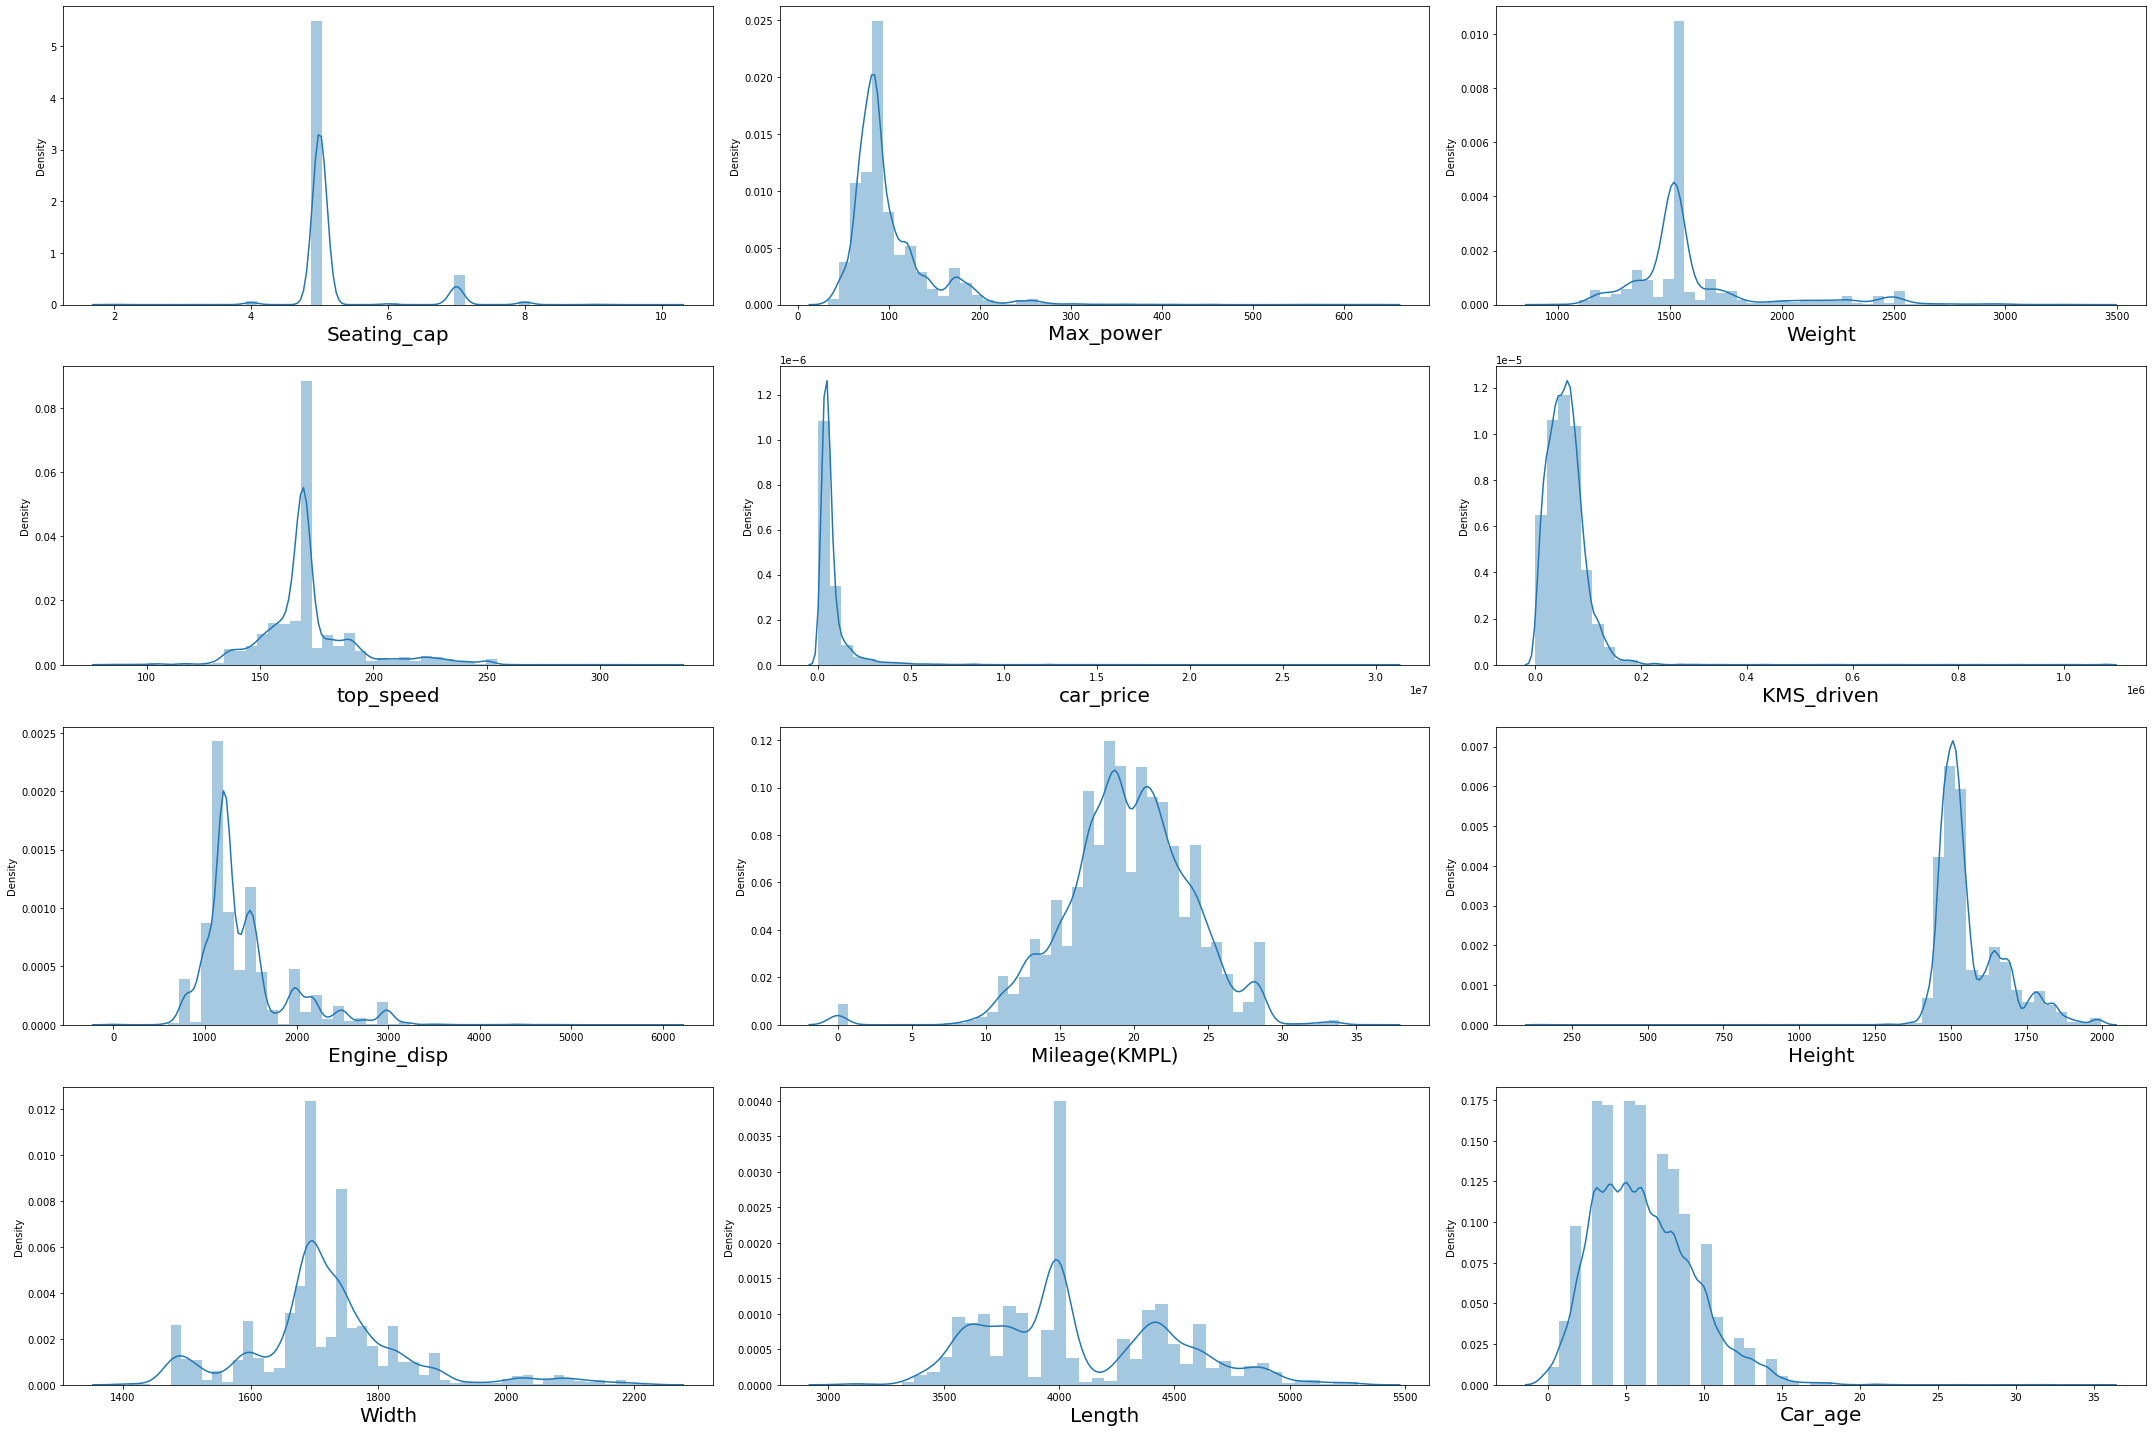

In [54]:
#Distribution plot for all numerical columns
plt.figure(figsize = (30,20))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

Skewness is present in almost all numerical columns.

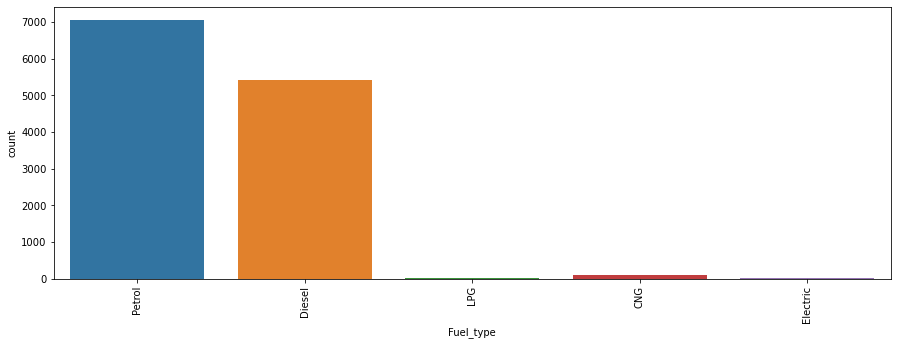

In [55]:
#Count plot for Fuel_type column
plt.figure(figsize=[15,5])
sns.countplot(df['Fuel_type'])
plt.xticks(rotation=90);

Maximum cars are petrol driven followed by diesel driven, whereas other fuels like LPG,CNG,Electric are very rare

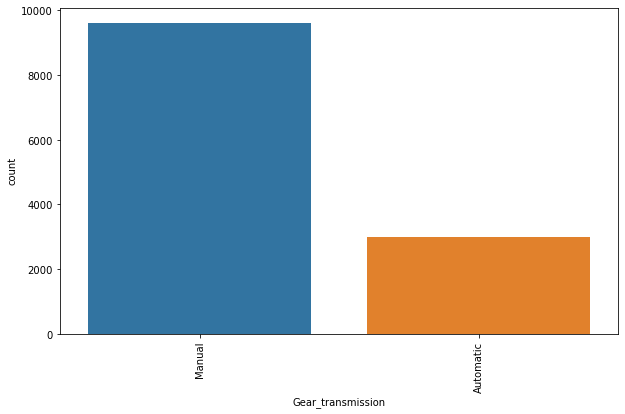

In [56]:
#Count plot for Gear_transmission column
plt.figure(figsize=[10,6])
sns.countplot(df['Gear_transmission'])
plt.xticks(rotation=90);

Most of the cars are with Manual gear transmission.

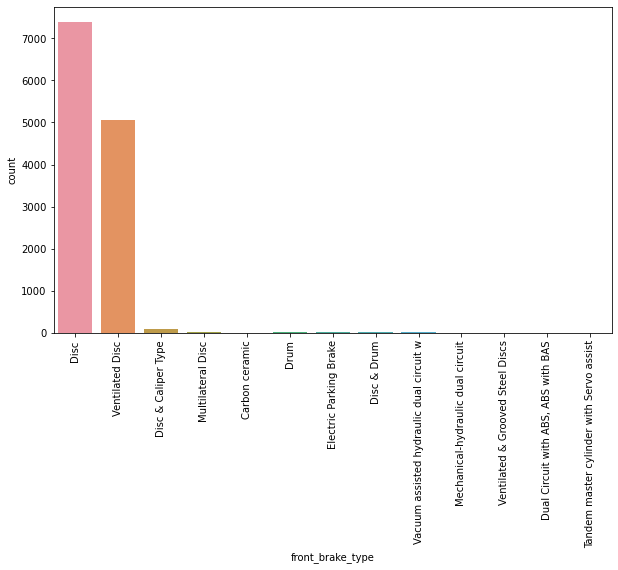

In [57]:
#Count plot for front_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['front_brake_type'])
plt.xticks(rotation=90);

Disc front brake cars are max in number followed by Ventilated Disc.

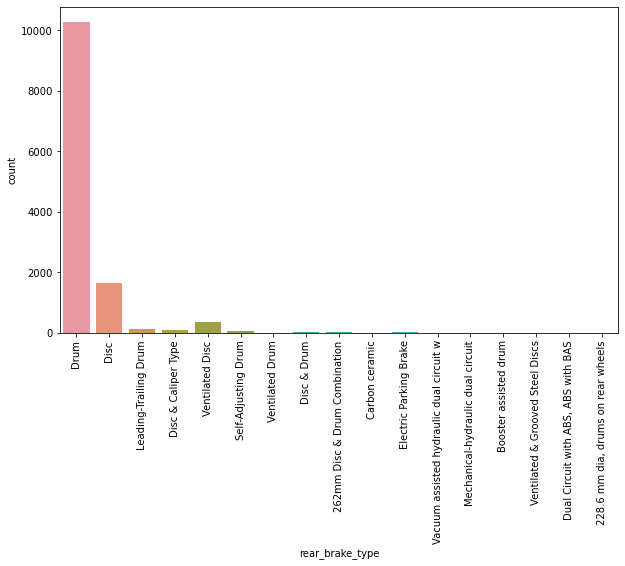

In [58]:
#Count plot for rear_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['rear_brake_type'])
plt.xticks(rotation=90);

Drum rare break cars are max in number.

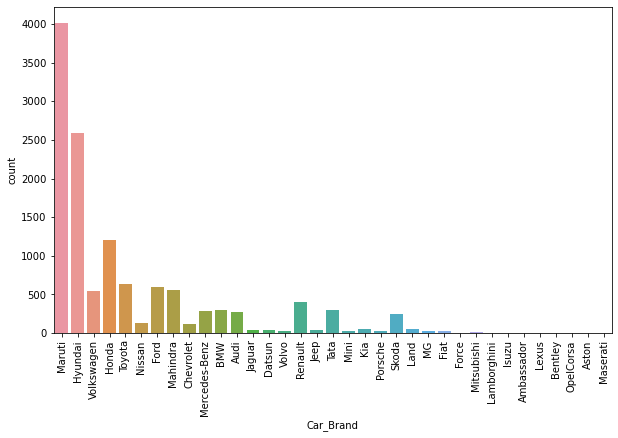

In [59]:
#Count plot for Car_Brand column
plt.figure(figsize=[10,6])
sns.countplot(df['Car_Brand'])
plt.xticks(rotation=90);

Maximum cars under sale are from Maruti followed by Hyundai.

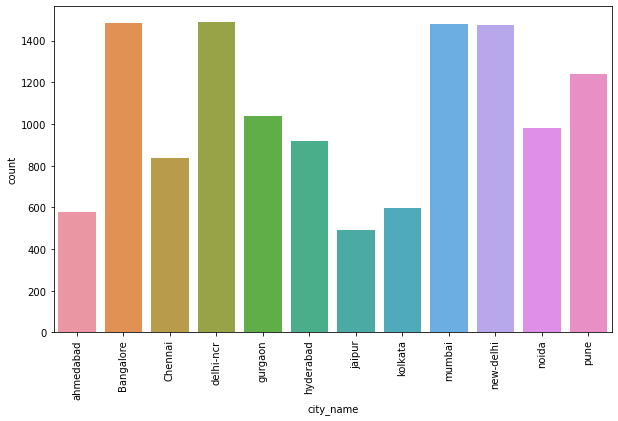

In [60]:
#Count plot for city_name column
plt.figure(figsize=[10,6])
sns.countplot(df['city_name'])
plt.xticks(rotation=90);

In Bangalore,delhi-ncr,mumbai and new-delhi we can find maximum cars for sale. Since these are most populated places.

# Bivariate Analysis:

In [61]:
col=['KMS_driven', 'Engine_disp', 'Mileage(KMPL)', 'Max_power', 'Height', 'Width', 'Length', 'Weight', 'top_speed']

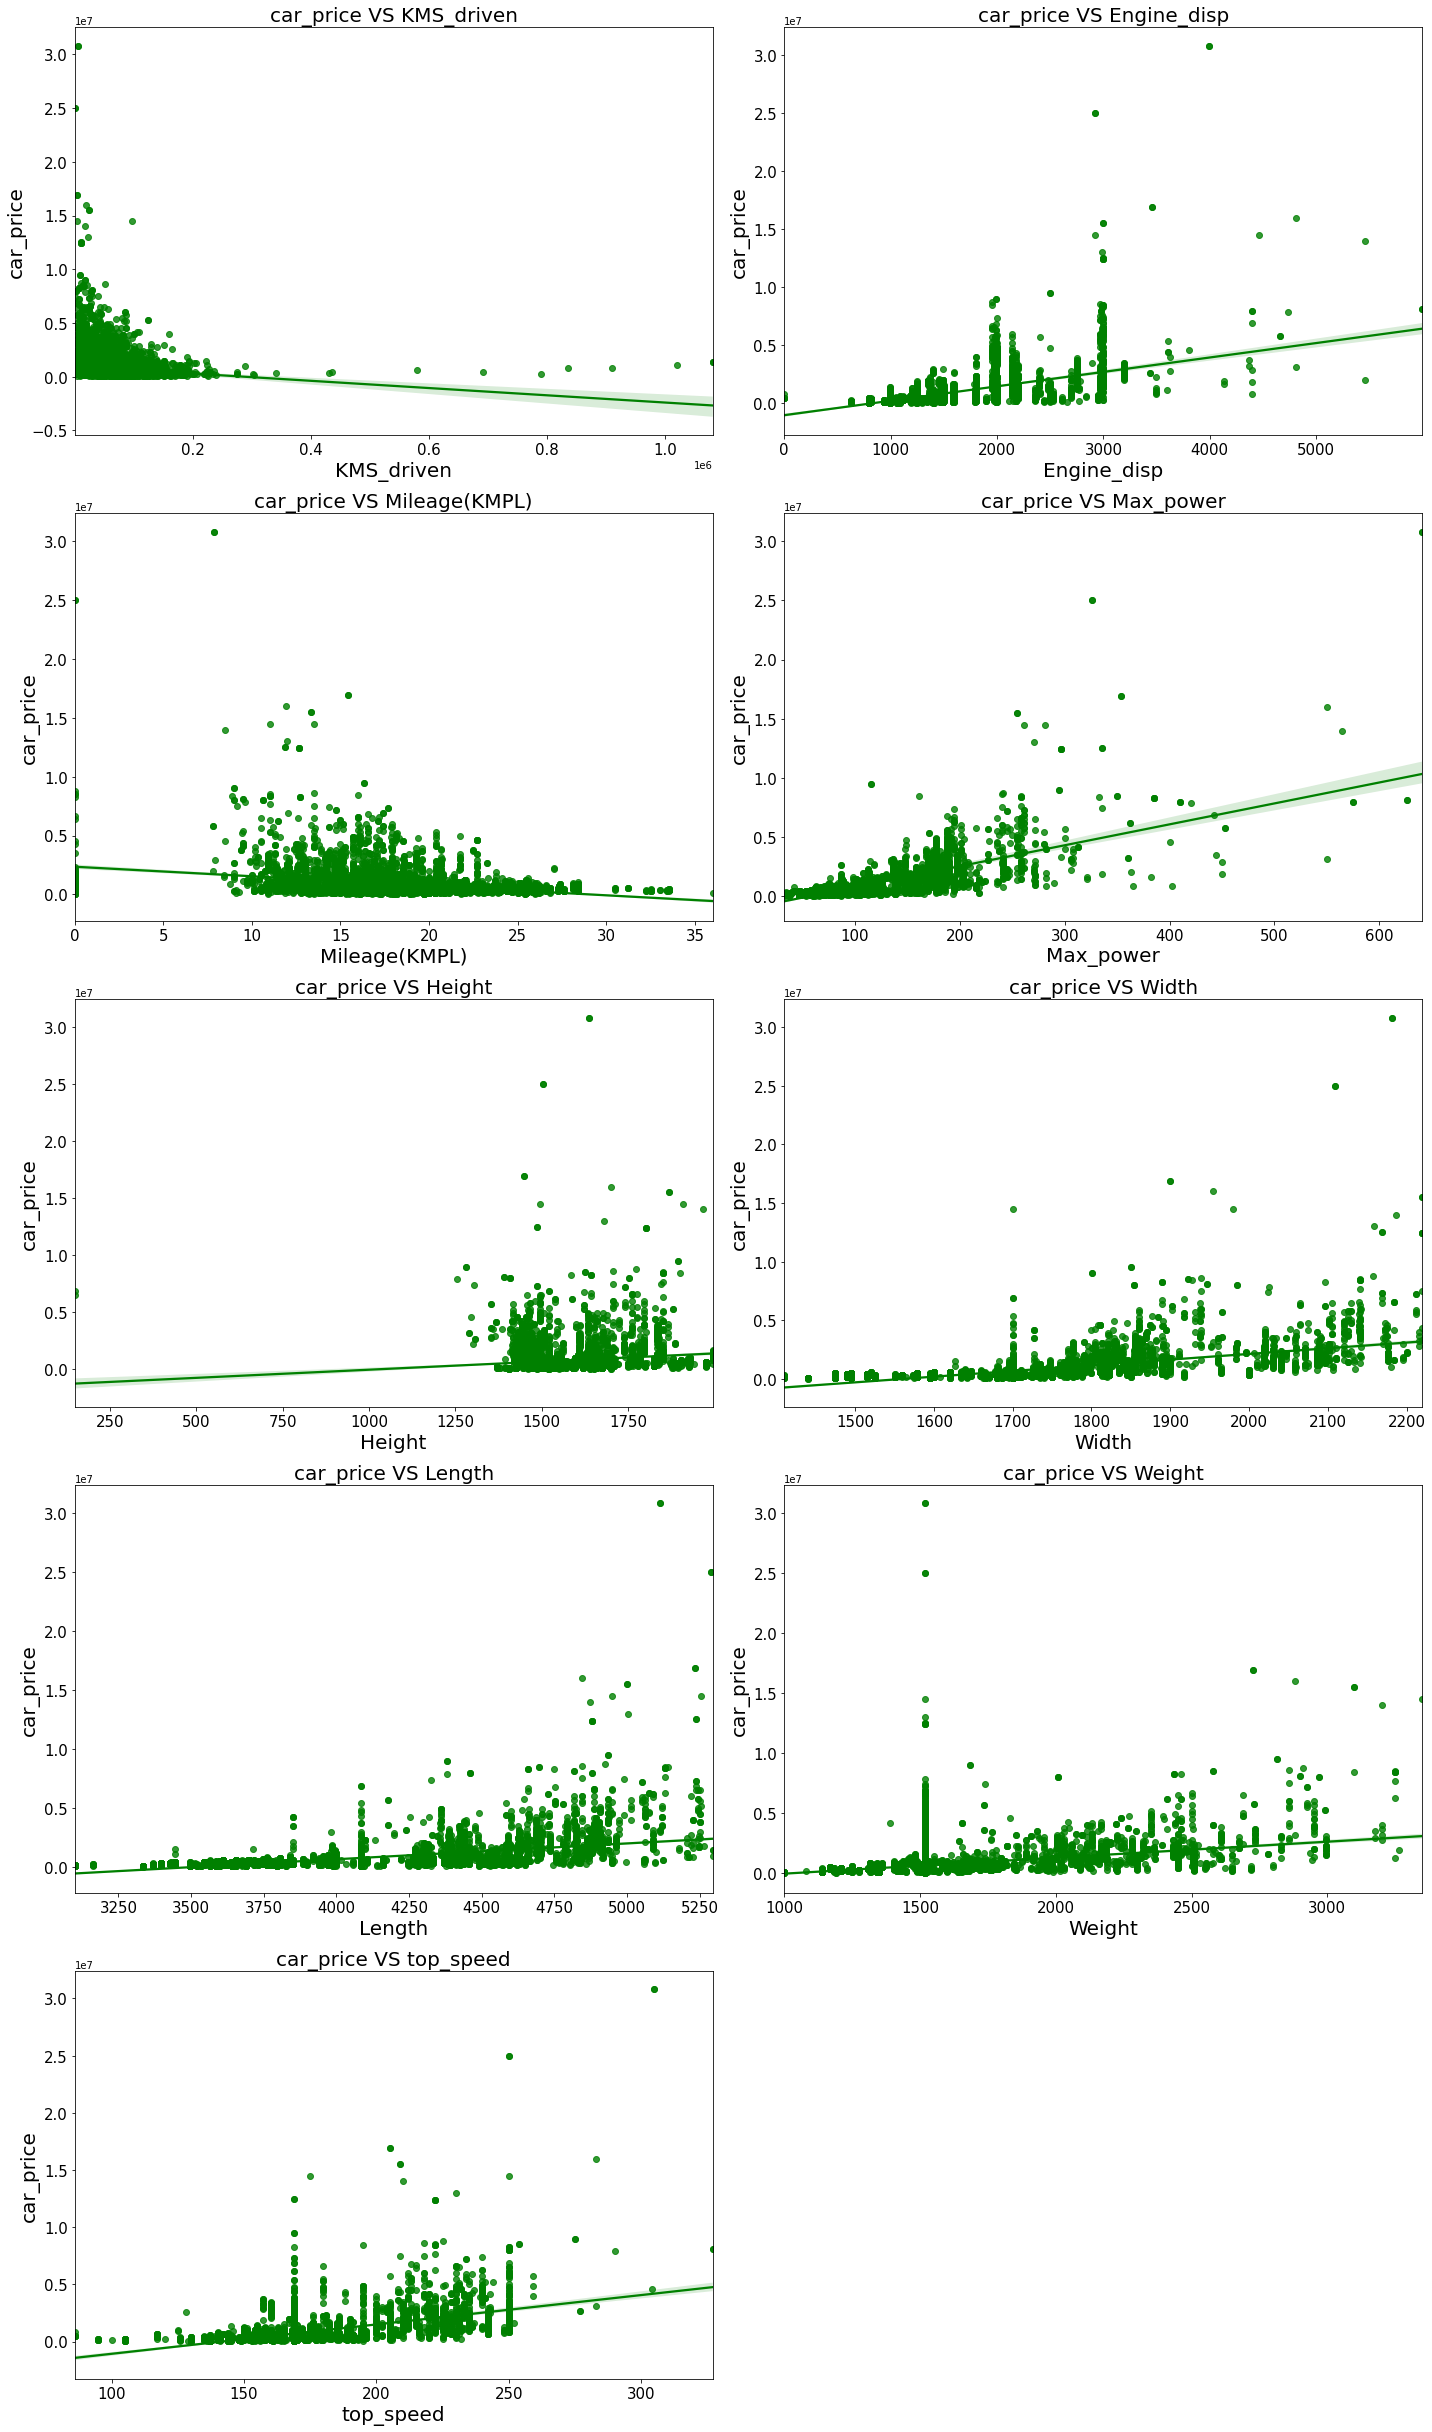

In [62]:
#regplot for numerical columns
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(6,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['car_price'],color="g")
    plt.title(f"car_price VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

**Observation:**

- Most of the cars are having below 20k driven kms. Car price is high for less driven cars.
- Most of the cars are having 1000-3000 Engine_disp. Car price is high for 3000 Engine_disp.
- Most of the cars are having mileage of 10-25kms. But Milage has no proper relation with car price.
- With increase in Max_power, car price is also increasing.
- Car_price has no proper relation with Height.
- As the width is increasing car price is also increasing.
- As length is increasing car price is also increasing.
- Weight also has linear relationship with car price.
- As top_speed is increasing car price is also increasing.

In [63]:
col1=['Seating_cap','Car_age']

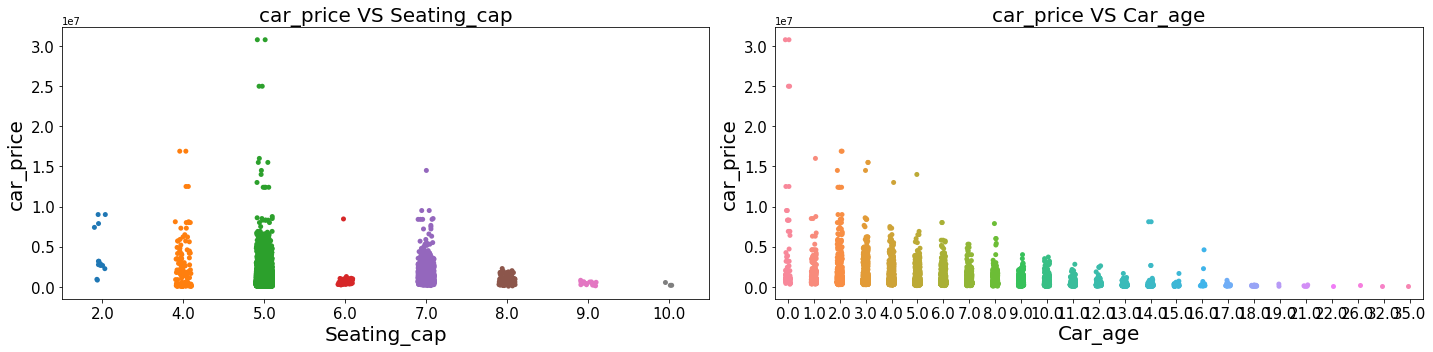

In [64]:
#stripplot for numerical columns
plt.figure(figsize=(20,5))
for i in range(len(col1)):
    plt.subplot(1,2,i+1)
    sns.stripplot(x=df[col1[i]] , y=df['car_price'])
    plt.title(f"car_price VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

- Cars with 5 and 4 seats are having highest price.
- As the age of the car increases the car price decreases.

In [65]:
col2=['Fuel_type', 'Gear_transmission', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'city_name']

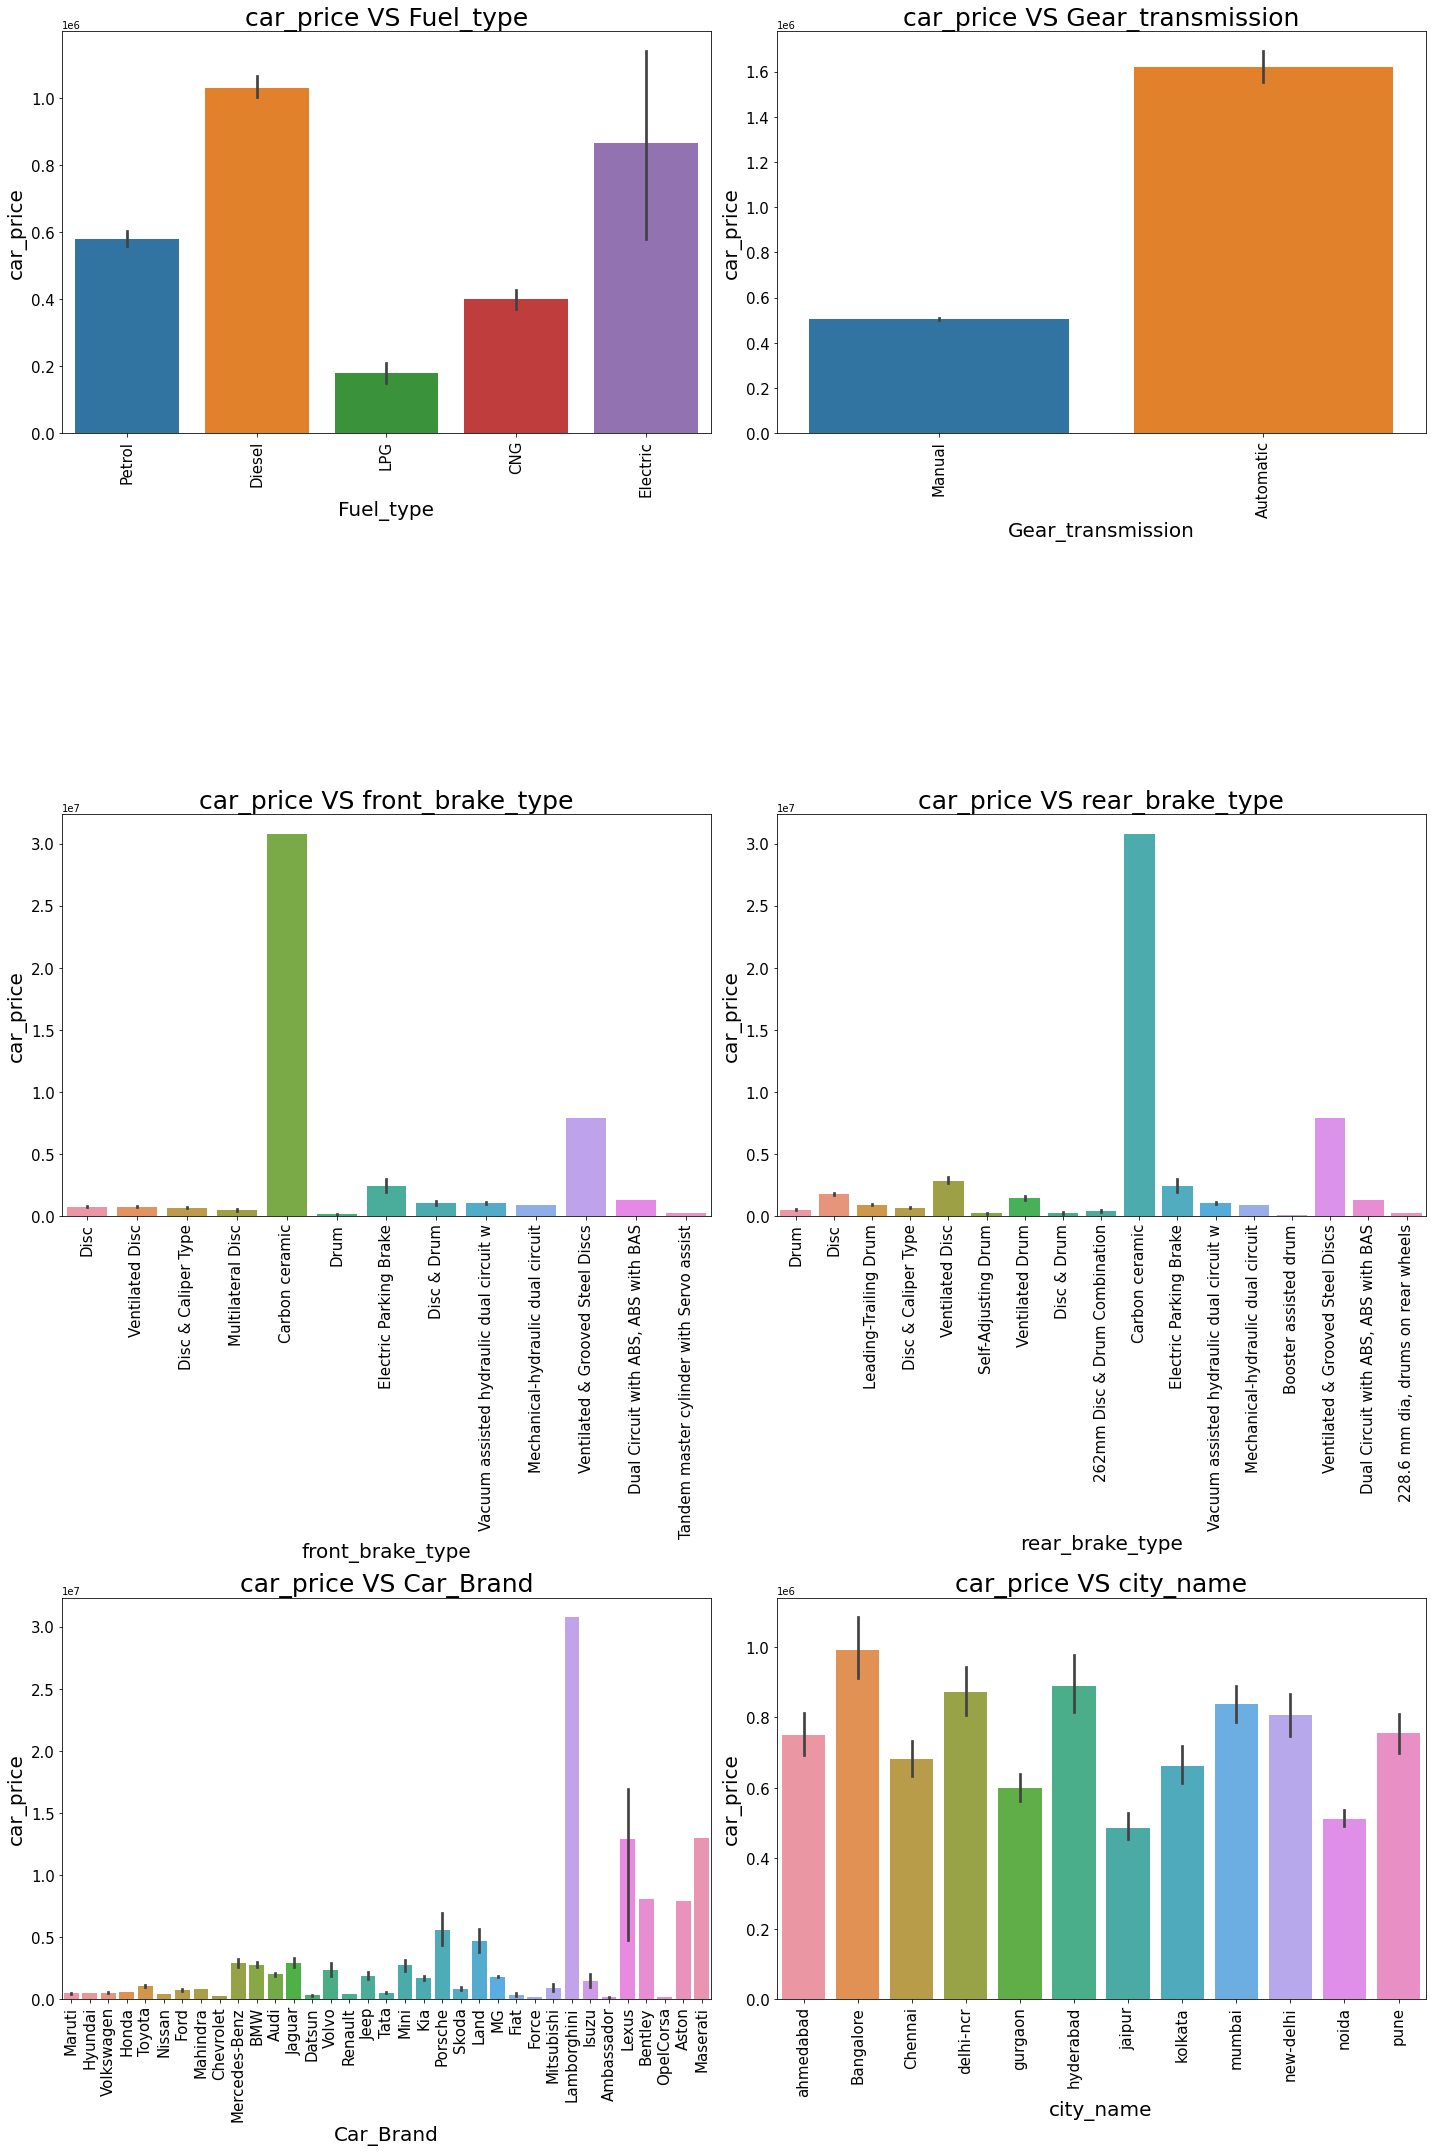

In [66]:
#Bar plot for all categorical columns
plt.figure(figsize=(20,30))
for i in range(len(col2)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['car_price'],x=df[col2[i]])
    plt.title(f"car_price VS {col2[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(col2[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

**Observations:**

- For Diesel and Electric cars the price is high compared to Petrol,LPG and CNG.
- Cars with automatic gear are costlier than manual gear cars.
- Cars with Carbon Ceramic front brake are costlier compared to other cars.
- Cars with carbon Ceramic rear brake are costlier compared to other cars.
- Lamborghini brand cars are having highset sale price.
- In Bangalore, Hyderabad and delhi-ncr the car prices are high as they are highly populated cities.

# Checking for outliers:

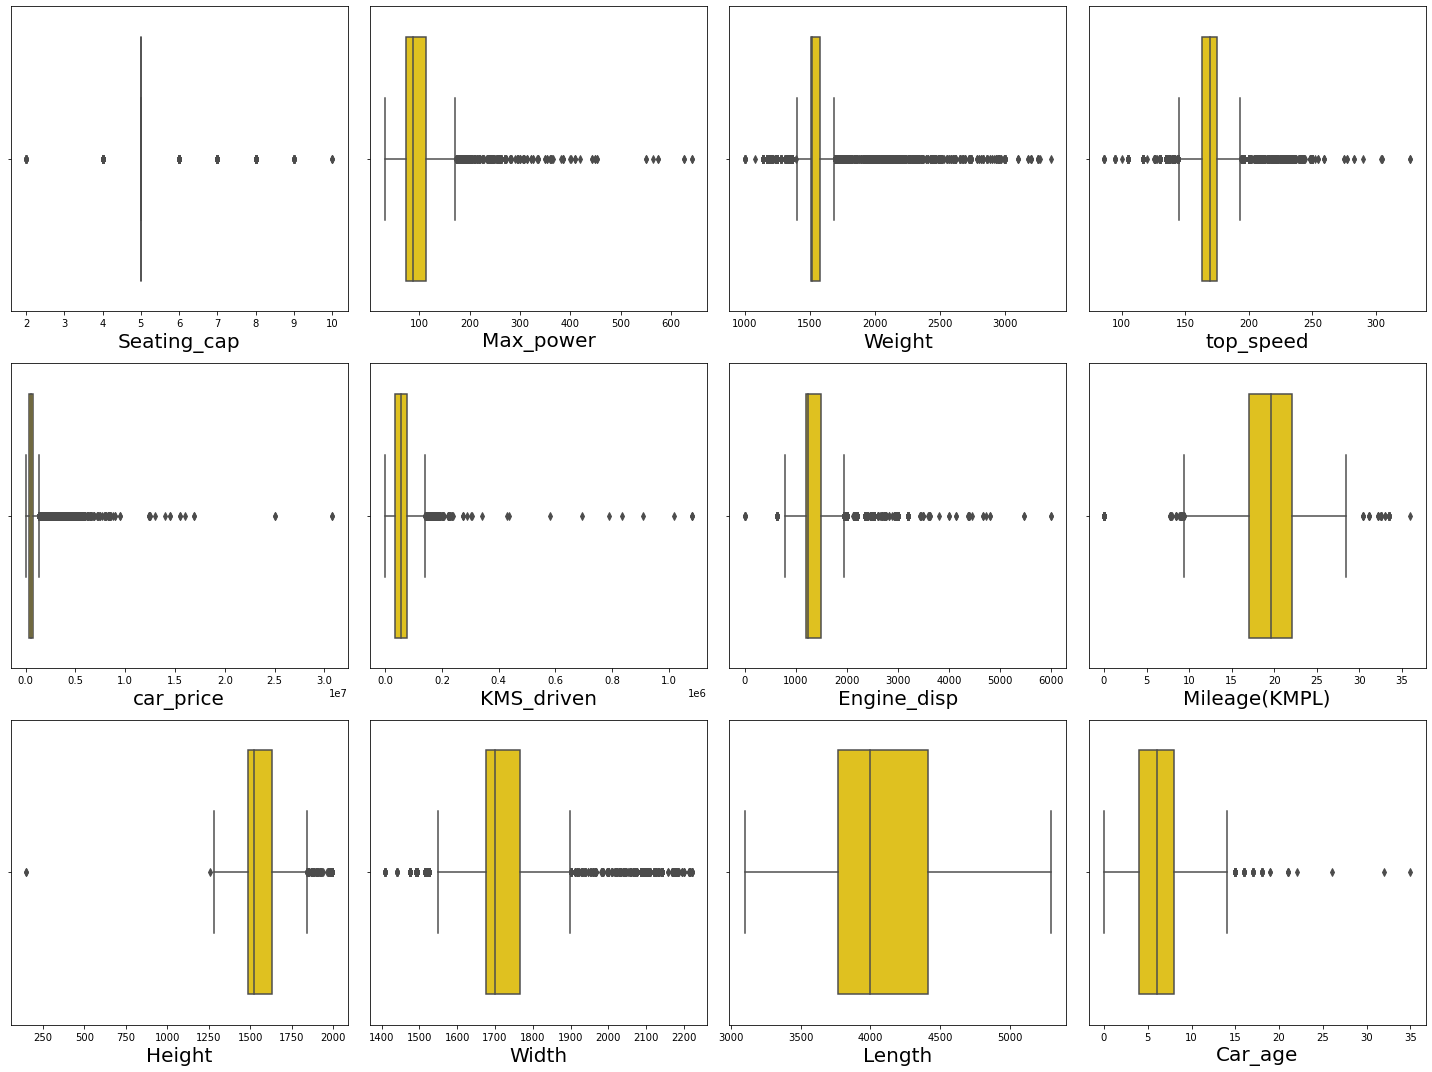

In [67]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in all columns except Length. Since car_price is our target we should not remove outliers from it.

# Removing Outliers:

# i) Zscore method:

In [68]:
#Features having outliers 
features=df[['KMS_driven', 'Engine_disp', 'Mileage(KMPL)', 'Seating_cap', 'Max_power', 'Height', 'Width', 'Weight', 'top_speed', 'Car_age']]

Above are the list of columns with outliers in the dataset.

In [69]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Fuel_type,Gear_transmission,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,Weight,top_speed,Car_Brand,Car_Model,car_price,KMS_driven,Engine_disp,Mileage(KMPL),Height,Width,Length,city_name,Car_age
0,Petrol,Manual,5.0,Grey,67.05,Disc,Drum,1340.0,169.0,Maruti,Wagon R,294000.0,131125.0,998.0,21.79,1675.0,1620.0,3655.0,ahmedabad,7.0
1,Petrol,Manual,5.0,White,82.00,Disc,Drum,1520.0,165.0,Hyundai,Grand i10,480000.0,73875.0,1197.0,18.90,1520.0,1660.0,3765.0,ahmedabad,6.0
2,Diesel,Manual,5.0,White,108.60,Ventilated Disc,Drum,1750.0,180.0,Volkswagen,Vento,711000.0,97922.0,1498.0,22.27,1467.0,1699.0,4390.0,ahmedabad,3.0
3,Petrol,Manual,5.0,Red,67.05,Ventilated Disc,Drum,1170.0,169.0,Maruti,S-Presso,422000.0,24230.0,998.0,21.70,1564.0,1520.0,3565.0,ahmedabad,2.0
4,Petrol,Automatic,5.0,Grey,67.00,Ventilated Disc,Drum,1350.0,152.0,Maruti,Wagon R,430000.0,41174.0,998.0,20.51,1700.0,1495.0,3599.0,ahmedabad,4.0


In [70]:
#Checking shape of new dataset
df_new.shape

(11481, 20)

In [71]:
#Checking shape of old dataset
df.shape

(12608, 20)

In [72]:
#Checking dataloss in zscore method
Dataloss = (((12608-11481)/12608)*100)
Dataloss

8.938769035532996

In Z-score method the data loss is less than 10%.

# ii) IQR method:

In [73]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Outliers removed by IQR method.

In [74]:
#Checking shape of new dataset
df_1.shape

(6464, 20)

In [75]:
#Checking shape of old dataset
df.shape

(12608, 20)

In [76]:
#Checking dataloss in IQR method of the dataset
Dataloss = (((12608-6464)/12608)*100)
Dataloss

48.73096446700508

In IQR method the data loss is almost 50% so we will use Z-score method only.

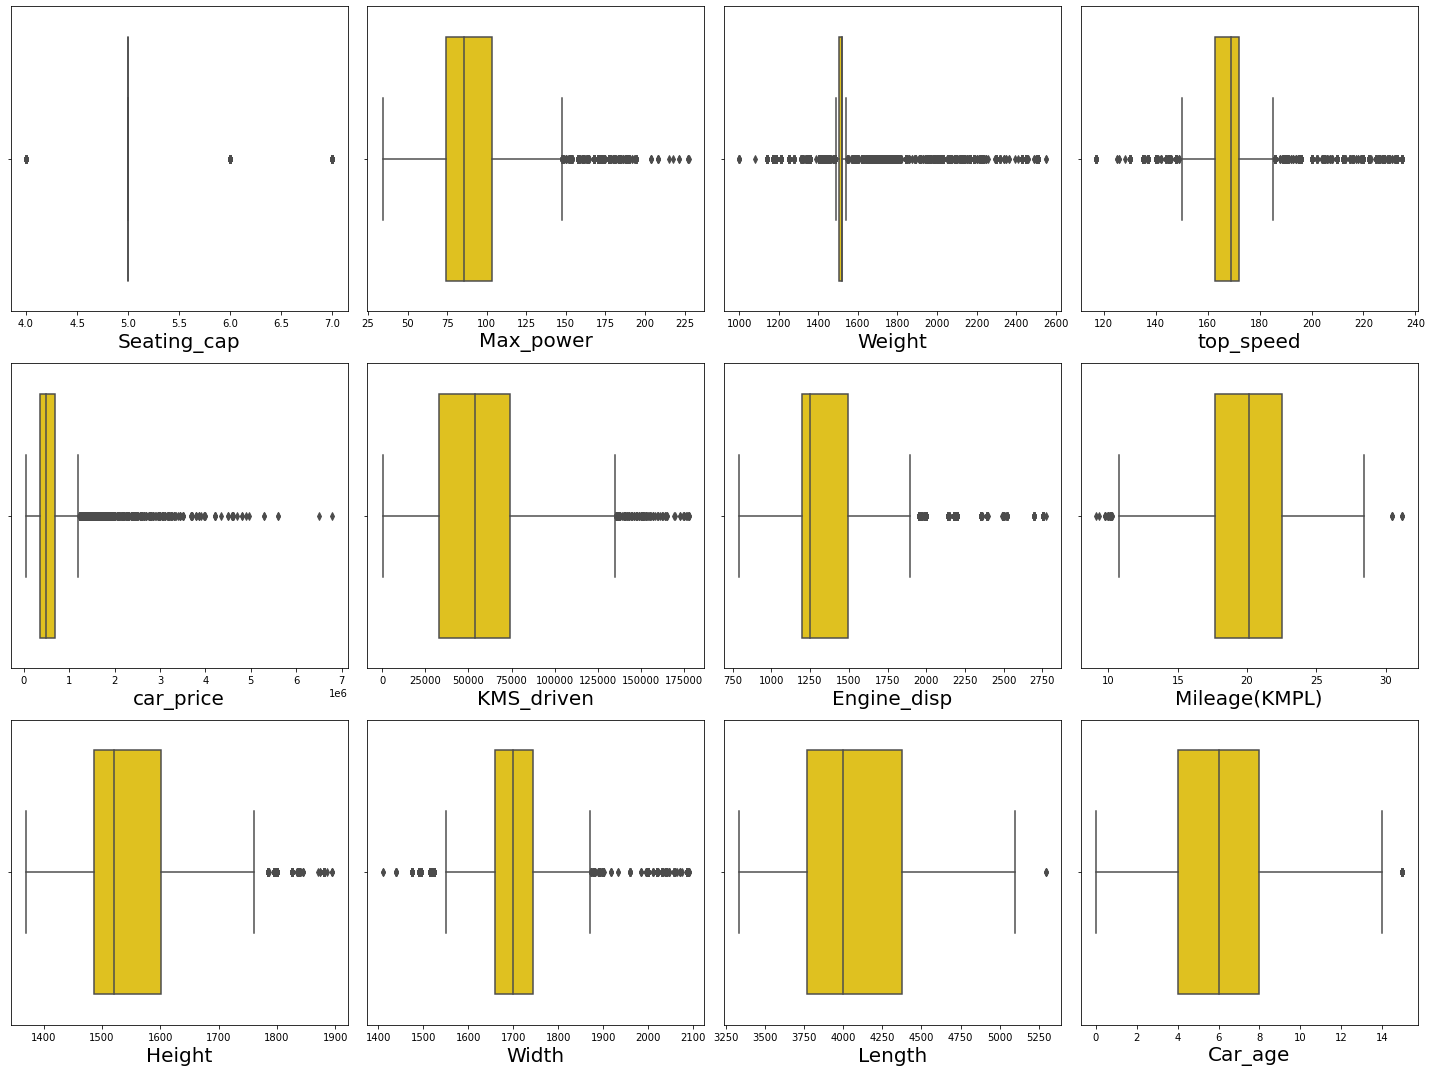

In [77]:
# Checking if the outliers is reduced or not

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df_new[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Lot of outliers has been removed.

# Checking for skewness:

In [78]:
# Now checking for numerical columns
num_columns=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]!='object':
        num_columns.append(i)
print(num_columns)

['Seating_cap', 'Max_power', 'Weight', 'top_speed', 'car_price', 'KMS_driven', 'Engine_disp', 'Mileage(KMPL)', 'Height', 'Width', 'Length', 'Car_age']


In [79]:
#Checking for skewness in the dataset
df_new[num_columns].skew()

Seating_cap      3.187292
Max_power        1.392424
Weight           1.908091
top_speed        0.966678
car_price        3.537058
KMS_driven       0.553747
Engine_disp      1.323144
Mileage(KMPL)    0.094848
Height           1.275943
Width            0.358475
Length           0.415214
Car_age          0.489995
dtype: float64

Skewness in all the numerical columns except Mileage(KMPL),Width,Length and Car_age. Since car_price is the target variable, we will not remove skewness in this column.

# Removing skewness using Power Transformer method:

In [80]:
#Creating a list of skewed features
fea=['KMS_driven', 'Engine_disp', 'Seating_cap', 'Max_power', 'Height', 'Weight', 'top_speed']

In [81]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [82]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

Got removed from skewness.

In [83]:
#Checking skewness again
df_new[fea].skew()

KMS_driven    -0.066951
Engine_disp   -0.019124
Seating_cap   -2.369892
Max_power     -0.017556
Height         0.000000
Weight        -0.120538
top_speed     -0.049855
dtype: float64

In all the columns skewness has reduced and in Height column skewness is zero after removing which means this column has single entry throught out. So let me drop this column as it has no impact on model building.

In [84]:
#Droping height column
df_new = df_new.drop(["Height"],axis=1)

# Label Encoding:

In [85]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']


Above are the list of categorical columns in df_new.

In [86]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [87]:
df_new[cat_col].head()

,Fuel_type,Gear_transmission,color,front_brake_type,rear_brake_type,Car_Brand,Car_Model,city_name
0,4,1,64,0,5,17,176,2
1,4,1,163,0,5,8,85,2
2,1,1,163,5,5,26,169,2
3,4,1,125,5,5,17,136,2
4,4,0,64,5,5,17,176,2


Using label encoder i have encoded the categorical columns.

# Checking correlation using heat map:

In [88]:
cor=df_new.corr()
cor

,Fuel_type,Gear_transmission,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,Weight,top_speed,Car_Brand,Car_Model,car_price,KMS_driven,Engine_disp,Mileage(KMPL),Width,Length,city_name,Car_age
Fuel_type,1.000000,0.010464,-0.189900,-0.022924,-0.277132,-0.072346,0.175211,-0.435803,-0.209243,-0.011471,-0.057383,-0.264371,-0.366456,-0.466931,-0.322595,-0.445961,-0.377342,0.001075,0.002961
Gear_transmission,0.010464,1.000000,0.016509,0.026381,-0.419817,0.036028,0.249026,-0.213069,-0.353655,0.067991,0.090295,-0.496451,0.112165,-0.307012,0.289495,-0.316690,-0.330819,0.028802,0.117629
Seating_cap,-0.189900,0.016509,1.000000,0.013384,0.170303,-0.010171,-0.073183,0.341320,-0.076168,0.092918,0.059382,0.103517,0.084825,0.258043,-0.188520,0.200896,0.254421,-0.021090,-0.059635
color,-0.022924,0.026381,0.013384,1.000000,-0.033060,-0.006231,0.004043,-0.017535,-0.050544,-0.008890,0.038208,-0.033909,0.047637,-0.021936,-0.004285,-0.019912,-0.033134,0.019021,0.000469
Max_power,-0.277132,-0.419817,0.170303,-0.033060,1.000000,-0.034228,-0.433055,0.662255,0.713394,-0.198882,0.020787,0.631624,0.088250,0.888419,-0.497127,0.781865,0.835939,-0.015664,-0.047097
front_brake_type,-0.072346,0.036028,-0.010171,-0.006231,-0.034228,1.000000,0.118525,-0.022854,0.006635,0.033393,-0.044090,-0.083888,0.126146,0.035726,0.038444,-0.060745,-0.026167,0.014070,0.198085
rear_brake_type,0.175211,0.249026,-0.073183,0.004043,-0.433055,0.118525,1.000000,-0.279426,-0.307627,-0.002777,-0.052151,-0.360607,-0.029926,-0.400740,0.239103,-0.333729,-0.395652,0.026345,-0.016757
Weight,-0.435803,-0.213069,0.341320,-0.017535,0.662255,-0.022854,-0.279426,1.000000,0.447784,-0.045513,0.175713,0.408783,0.202939,0.709730,-0.385836,0.663607,0.641639,-0.021533,0.037189
top_speed,-0.209243,-0.353655,-0.076168,-0.050544,0.713394,0.006635,-0.307627,0.447784,1.000000,-0.198261,0.027510,0.481739,0.087301,0.622660,-0.255270,0.585441,0.622371,0.001516,0.031261
Car_Brand,-0.011471,0.067991,0.092918,-0.008890,-0.198882,0.033393,-0.002777,-0.045513,-0.198261,1.000000,0.101626,-0.130392,0.000461,-0.099083,0.102649,-0.122908,-0.016548,0.020650,-0.076979


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,lets plot it using heat map.

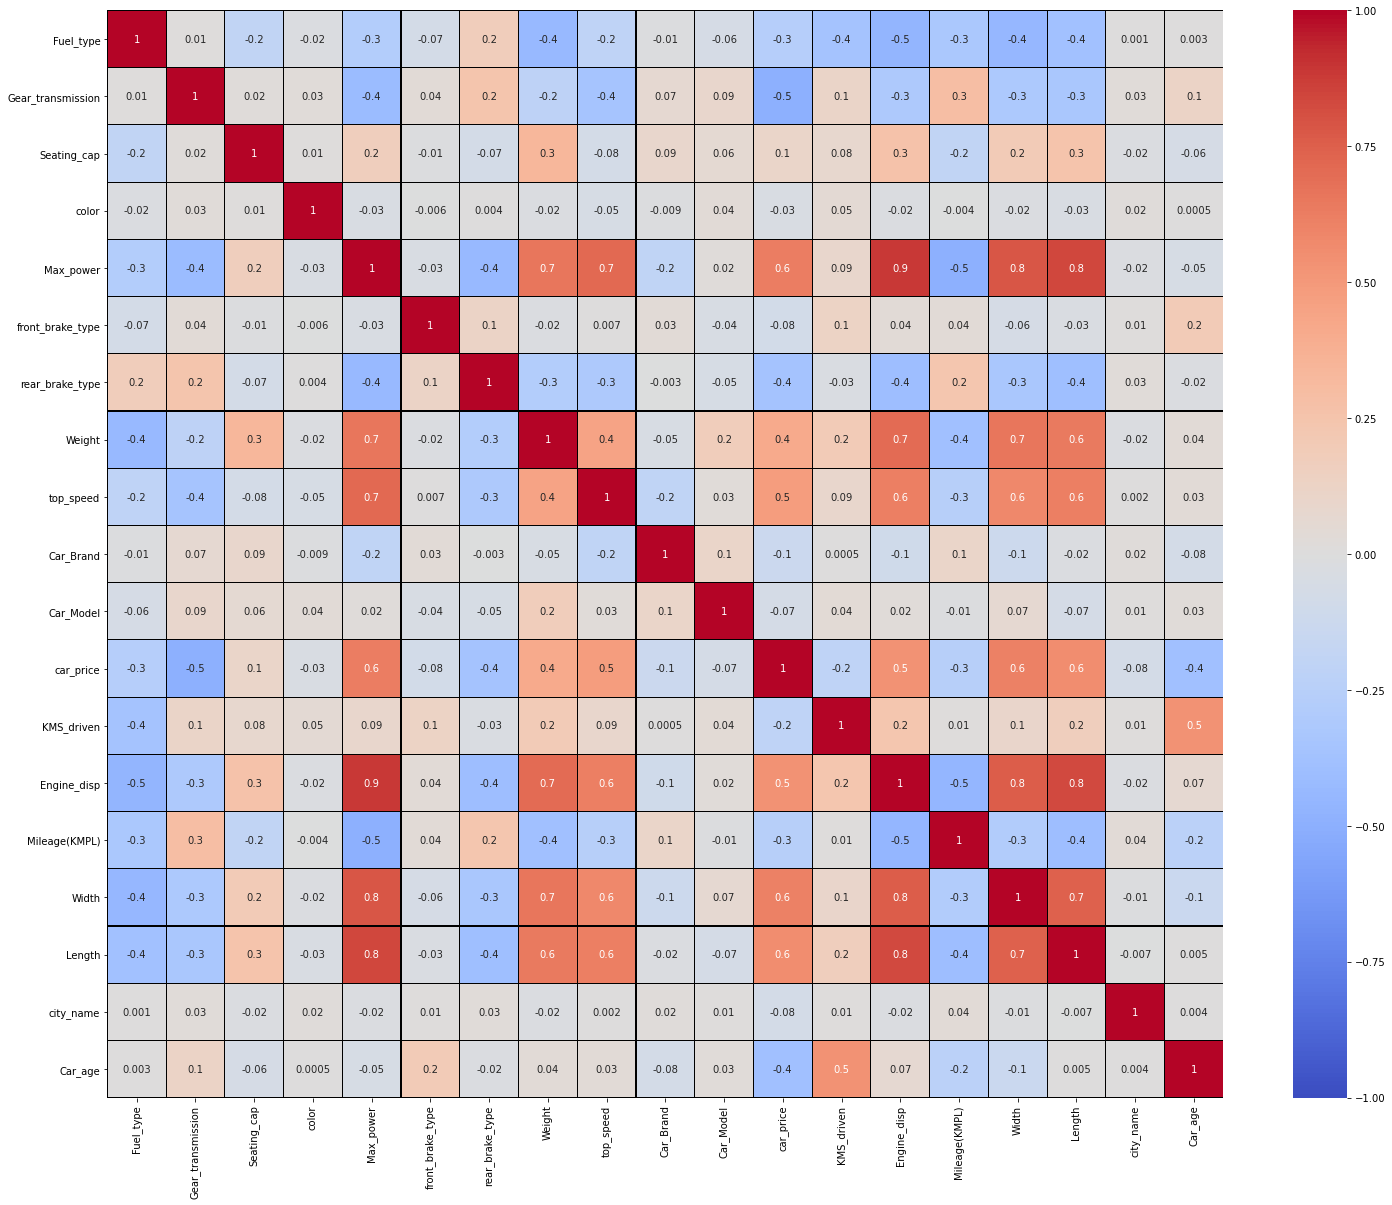

In [89]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

There is multicolinearity issue in the dataset. So we have to use VIF to remove multicolinearity.

Let's visualize the correlation of all the features with target to get better insight.

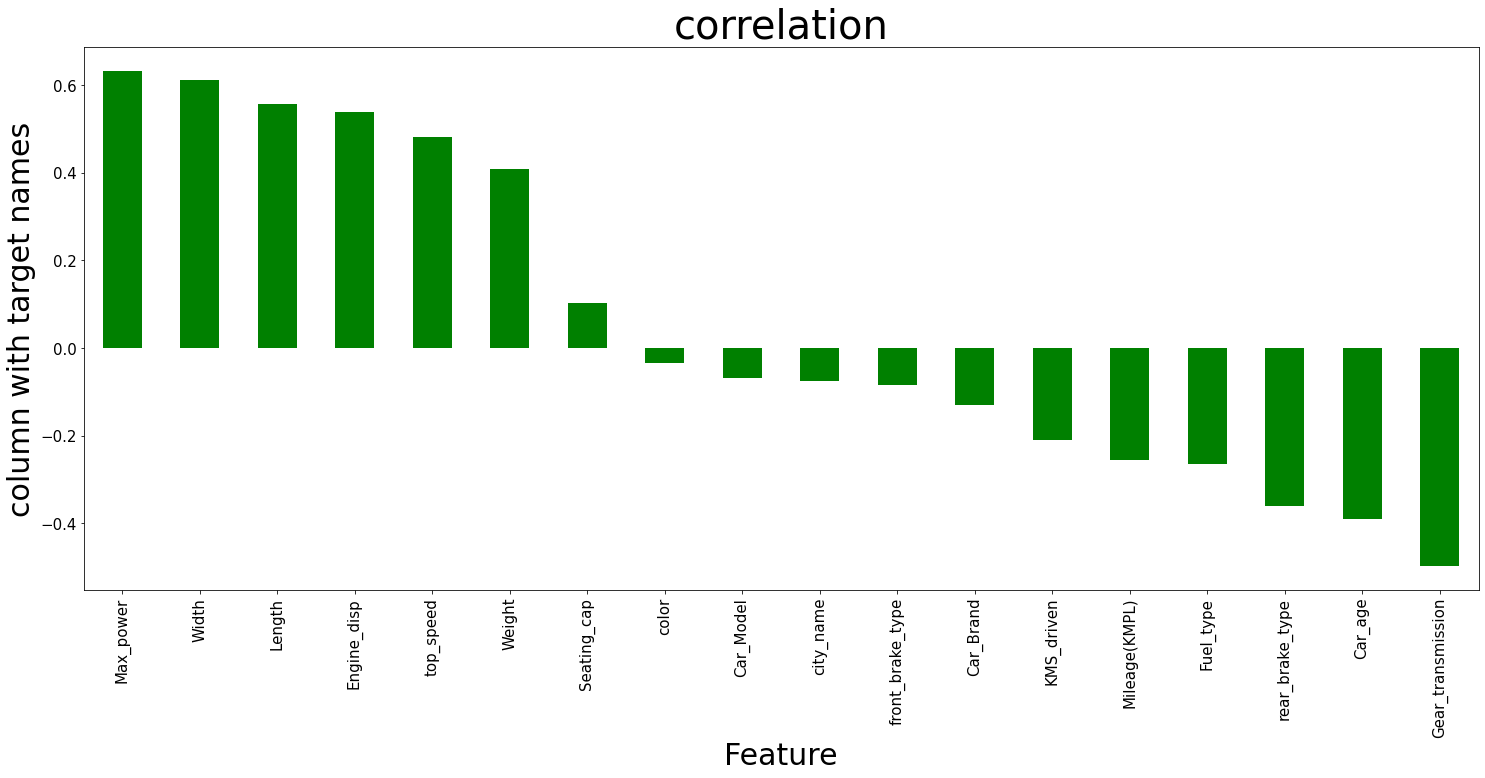

In [90]:
plt.figure(figsize=(25,10))
df_new.corr()['car_price'].sort_values(ascending=False).drop(['car_price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

color is less correlated with target.

# Separating Features and Target:

In [91]:
x = df_new.drop("car_price",axis=1)
y = df_new["car_price"]

# Scaling the data using Standard scaler:

In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

Data has been scaled using Standard scaler.

In [93]:
X.head()

,Fuel_type,Gear_transmission,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,Weight,top_speed,Car_Brand,Car_Model,KMS_driven,Engine_disp,Mileage(KMPL),Width,Length,city_name,Car_age
0,0.821974,0.511787,-0.19967,-0.939515,-1.002315,-0.810819,0.287785,-1.079309,0.030349,0.475229,1.119280,2.130695,-1.195810,0.470290,-0.790362,-1.073736,-0.997096,0.336469
1,0.821974,0.511787,-0.19967,1.064776,-0.221629,-0.810819,0.287785,0.027186,-0.215359,-0.853907,-0.371963,0.676649,-0.323042,-0.340682,-0.415408,-0.765969,-0.997096,0.000351
2,-1.208525,0.511787,-0.19967,1.064776,0.729578,1.241794,0.287785,0.991807,0.653755,1.804364,1.004569,1.327903,0.627849,0.604985,-0.049827,0.982707,-0.997096,-1.008003
3,0.821974,0.511787,-0.19967,0.295453,-1.002315,1.241794,0.287785,-2.600515,0.030349,0.475229,0.463788,-1.041906,-1.195810,0.445035,-1.727747,-1.325546,-0.997096,-1.344121
4,0.821974,-1.953939,-0.19967,-0.939515,-1.005376,1.241794,0.287785,-1.006562,-1.096125,0.475229,1.119280,-0.366963,-1.195810,0.111106,-1.962093,-1.230418,-0.997096,-0.671885


# Checking for multicolinearity issue using VIF:

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,3.379790,Fuel_type
1,1.348078,Gear_transmission
2,1.334998,Seating_cap
3,1.013441,color
4,10.009658,Max_power
5,1.095950,front_brake_type
6,1.310114,rear_brake_type
7,2.697876,Weight
8,2.428965,top_speed
9,1.234147,Car_Brand


In [95]:
#Droping high VIF columns
X = X.drop(["Max_power"],axis=1)

In [96]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,3.150828,Fuel_type
1,1.308243,Gear_transmission
2,1.329129,Seating_cap
3,1.013429,color
4,1.095948,front_brake_type
5,1.281711,rear_brake_type
6,2.676336,Weight
7,2.256584,top_speed
8,1.136379,Car_Brand
9,1.152432,Car_Model


Everything looks good now.

# Finding Best Random State and Accuracy:

In [97]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [98]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9653890346044303  on Random_state  114


In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# Regression Algorithms:

In [102]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import cross_val_score as cvs
from sklearn import metrics

# Training and Testing the models

In [103]:
RFR=RandomForestRegressor()
DTR=DecisionTreeRegressor()
SVR=SVR()
LR=LinearRegression()
KNR=KNN()
XGBR=XGBRegressor()
GBR=GBR()

In [104]:
models=[RFR,DTR,SVR,LR,KNR,XGBR,GBR]

In [105]:
for m in models:
    m.fit(X_train,y_train)
    pred=m.predict(X_test)
    R2_score=r2_score(y_test,pred)*100
    print(m," Results :")
    print('\nR2_score:',R2_score)
    print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
    print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
    print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
    #cross validation score
    CVS = cvs(m, X, y, cv = 10).mean()*100
    print("\nCross validation score :", CVS)

    #difference of accuracy and cv score
    diff = R2_score - CVS
    print("\nR2_Score - Cross Validation Score :", diff)
    print("\n")

RandomForestRegressor()  Results :

R2_score: 96.60108430654607
mean_squared_error: 8871009135.413982
mean_absolute_error: 50855.39521846707
root_mean_squared_error: 94186.03471541831

Cross validation score : 92.85744434721555

R2_Score - Cross Validation Score : 3.7436399593305225


DecisionTreeRegressor()  Results :

R2_score: 92.38574678926244
mean_squared_error: 19872840600.870827
mean_absolute_error: 63509.86937590711
root_mean_squared_error: 140971.0629912069

Cross validation score : 88.72775566102244

R2_Score - Cross Validation Score : 3.657991128239999


SVR()  Results :

R2_score: -6.013119700186476
mean_squared_error: 276689226256.8672
mean_absolute_error: 279724.72377090313
root_mean_squared_error: 526012.5723372657

Cross validation score : -7.618242030879903

R2_Score - Cross Validation Score : 1.605122330693427


LinearRegression()  Results :

R2_score: 65.37792791225606
mean_squared_error: 90361969956.72887
mean_absolute_error: 179646.06388251757
root_mean_squared_err

Looking into the results, it is clear that XGBoost is the best model

# Hyper parameter tunning for best model:

In [107]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [108]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [111]:
import xgboost

In [112]:
xgbr = xgboost.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

In [114]:
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
Lowest RMSE:  111090.44540502375


Tunning the model using Grid Search CV

Got the best parameters for XGBRegressor.

In [115]:
Best_mod=XGBRegressor(colsample_bytree=0.7,learning_rate=0.1,max_depth=3,n_estimators=1000)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 97.16024210704445
mean_squared_error: 7411633733.454948
mean_absolute_error: 52582.854951696296
RMSE value: 86090.84581681695


After Hyper tuning, R2_Score increased from 96.88 to 97.16 and also RMSE got reduced which is good.

# Saving the model:

In [117]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Price.obj")

['Price.obj']

model was saved as Price.obj file

# Predictions:

In [118]:
# Loading the saved model
model=joblib.load("Price.obj")

#Prediction
prediction = model.predict(X_test)
prediction

array([ 377009.34, 1603497.1 ,  426911.53, ...,  582244.9 ,  195468.89,
        365565.66], dtype=float32)

In [119]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444
Predicted,377009.34375,1603497.125,426911.53125,386714.03125,551353.8125,439637.96875,598355.625,598355.625,1568343.5,688819.8125,...,930666.625,9.212106e+05,474411.53125,751924.875,692959.5,545380.3125,1721845.75,582244.875,195468.890625,365565.65625
Actual,379000.00000,1650000.000,465000.00000,435000.00000,550000.0000,450000.00000,550000.000,550000.000,1500000.0,643000.0000,...,725000.000,1.004000e+06,410000.00000,668000.000,775000.0,490000.0000,1390000.00,575000.000,210000.000000,346000.00000


Above are the predicted values and the actual values.They are almost similar.

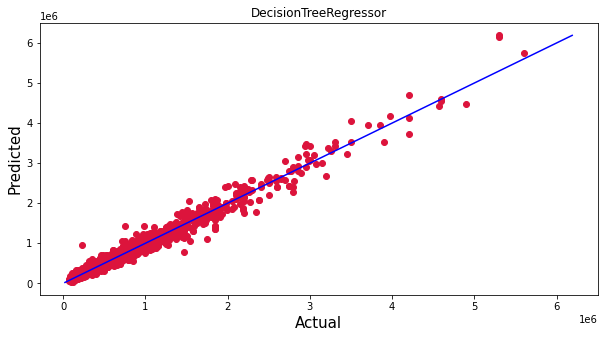

In [120]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("DecisionTreeRegressor")
plt.show()

Plotting Actual vs Predicted to get better insight.
Blue line is the actual line and red dots are the predicted values.